In [3]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
# from evaluation_script.evaluate import *

In [40]:
case = 'test'

In [41]:
path = f'/group/bagel/Task_1.B/MRI_Segmentation_and_TumorClassification/Brata2020_Unet_segmentation/pred_data/{case}/data/segmentation-metrics.csv'
data = pd.read_csv(path)

data.replace([np.nan, -np.inf, np.inf], np.nan, inplace=True)
# data.replace(['nan', 'inf', '-inf'], np.nan, inplace=True)

data.dropna(inplace=True)
data.dropna(inplace=True)

metrics = ['dice_1', 'dice_2', 'dice_4', 'hd_tc', 'hd_wt']

In [42]:
data.loc[:, metrics].mean()

dice_1     0.781769
dice_2     0.789247
dice_4     0.856008
hd_tc     11.372735
hd_wt     28.915573
dtype: float64

In [43]:
data.loc[:, metrics].mean().iloc[0:3].mean() # avg of all dices

0.8090079271377936

In [44]:
data.loc[:, metrics].std()

dice_1     0.247330
dice_2     0.143581
dice_4     0.139148
hd_tc     10.741266
hd_wt     20.874734
dtype: float64

In [45]:
data.loc[:, metrics].mean().iloc[0:3].std() # std of all dices

0.04087421335234948

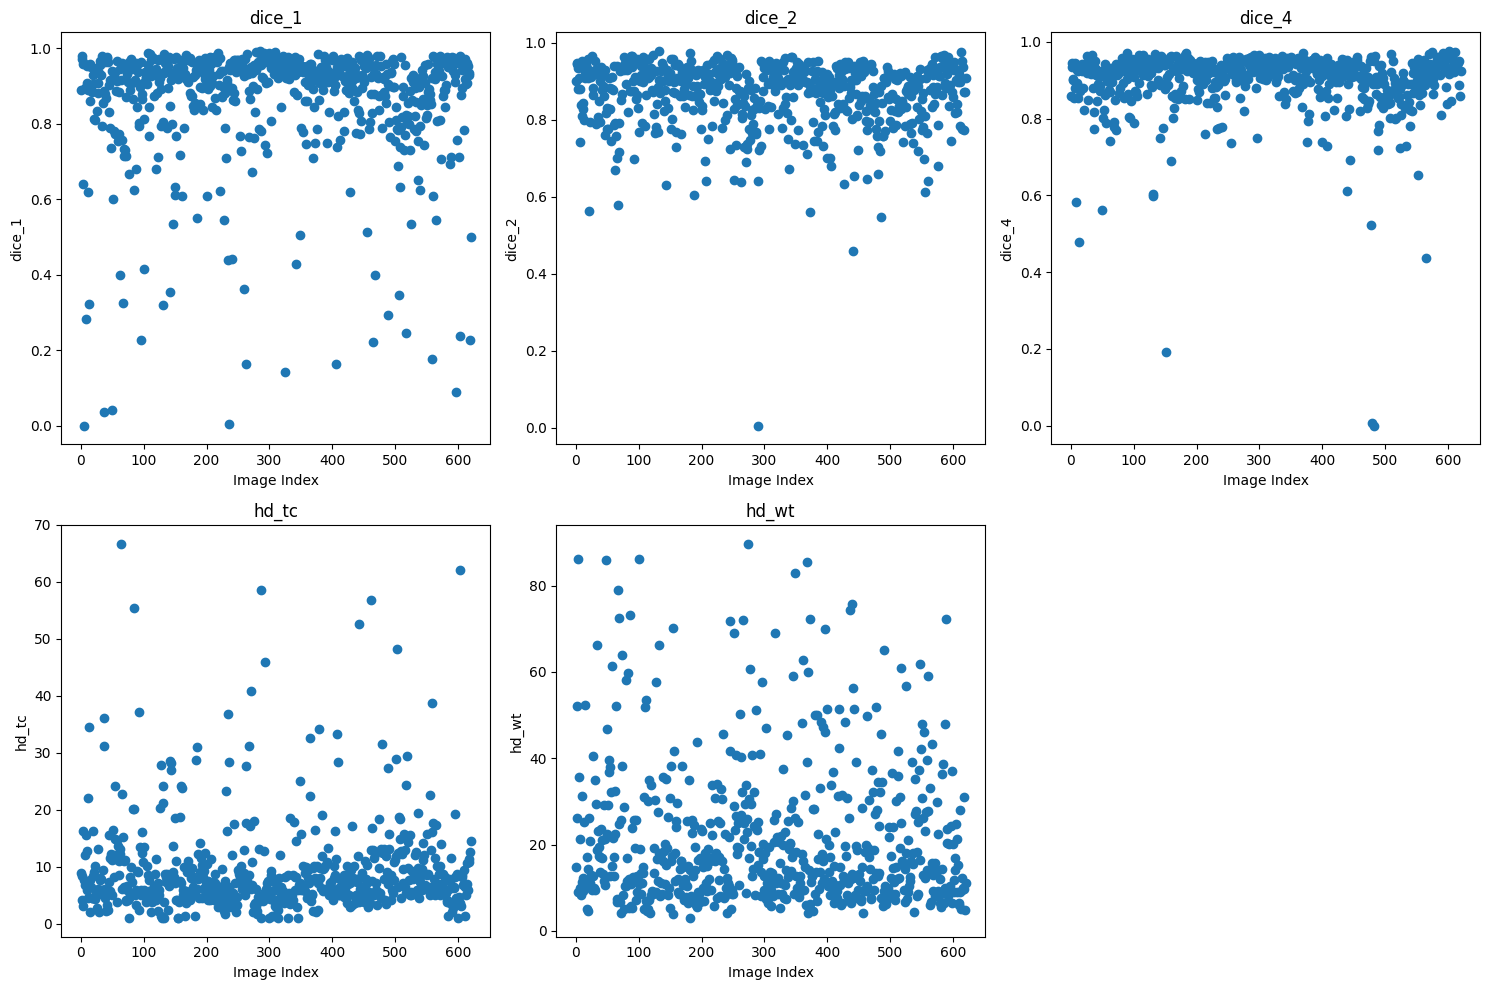

In [54]:
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.scatter(range(len(data)), data[metric]) 
    plt.title(metric)
    plt.xlabel('Image Index') 
    plt.ylabel(metric)

plt.tight_layout()
plt.savefig(f'figs/eval_{case}_scatter.png')

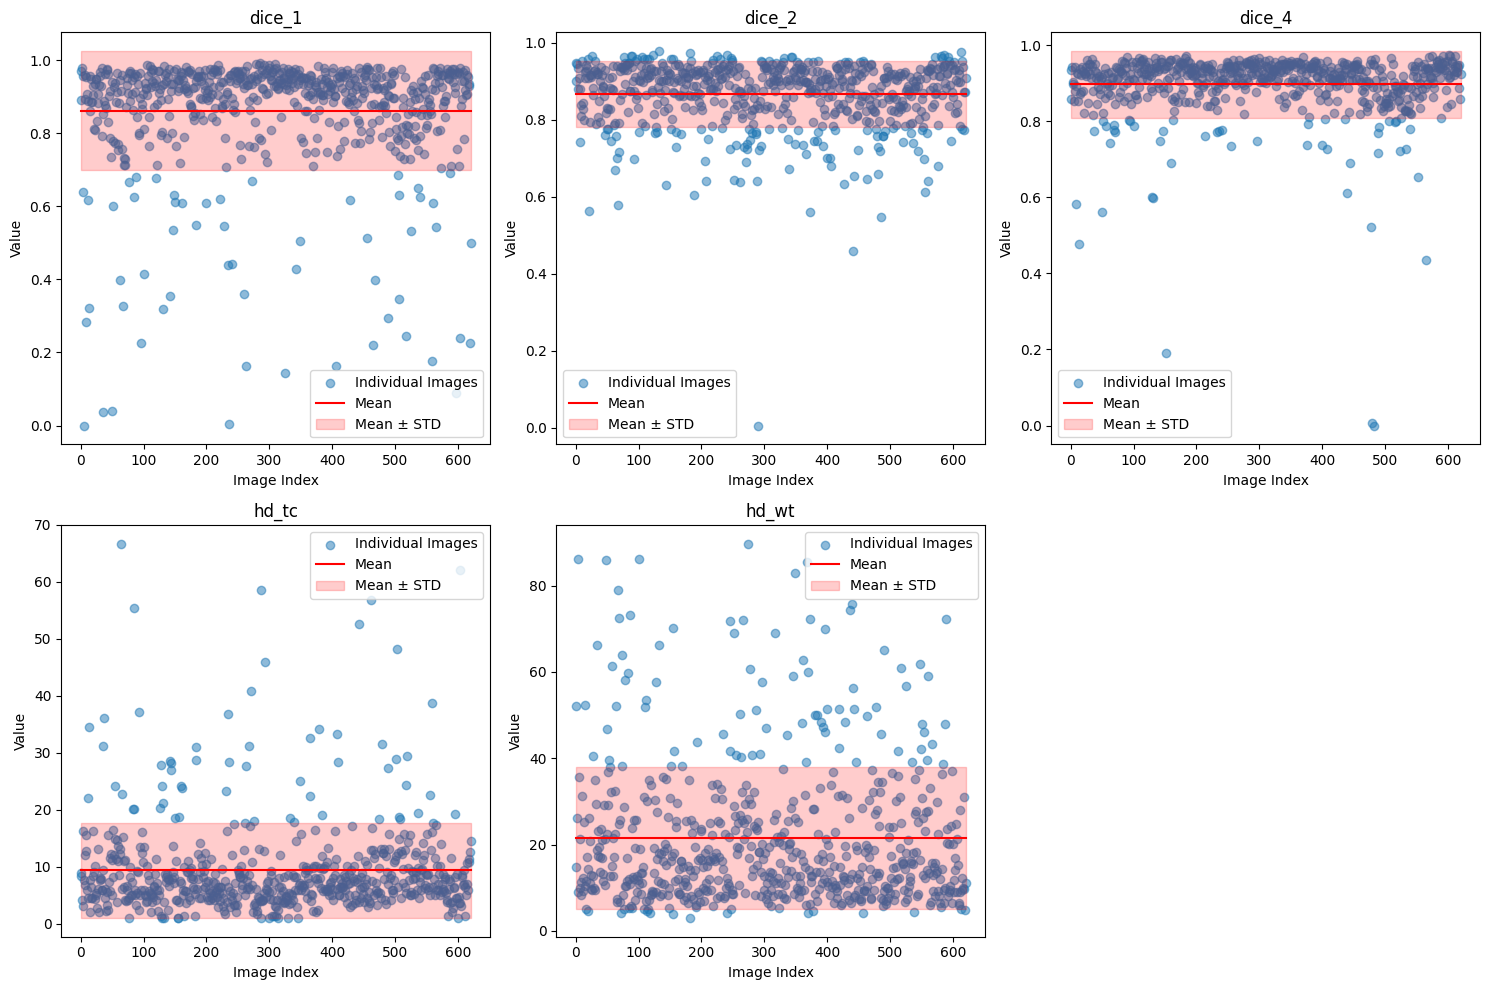

In [55]:
plt.figure(figsize=(15, 10))

for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)

    plt.scatter(range(len(data)), data[metric], alpha=0.5, label='Individual Images')
    
    # Line plot with range
    mean_val = data[metric].mean()
    std_dev = data[metric].std()
    plt.plot([0, len(data) - 1], [mean_val, mean_val], 'r-', label='Mean')
    plt.fill_between([0, len(data) - 1], [mean_val - std_dev, mean_val - std_dev], [mean_val + std_dev, mean_val + std_dev], color='r', alpha=0.2, label='Mean ± STD')
    
    plt.title(metric)
    plt.xlabel('Image Index')
    plt.ylabel('Value')
    plt.legend()

plt.tight_layout()

plt.savefig(f'figs/eval_{case}_line.png')


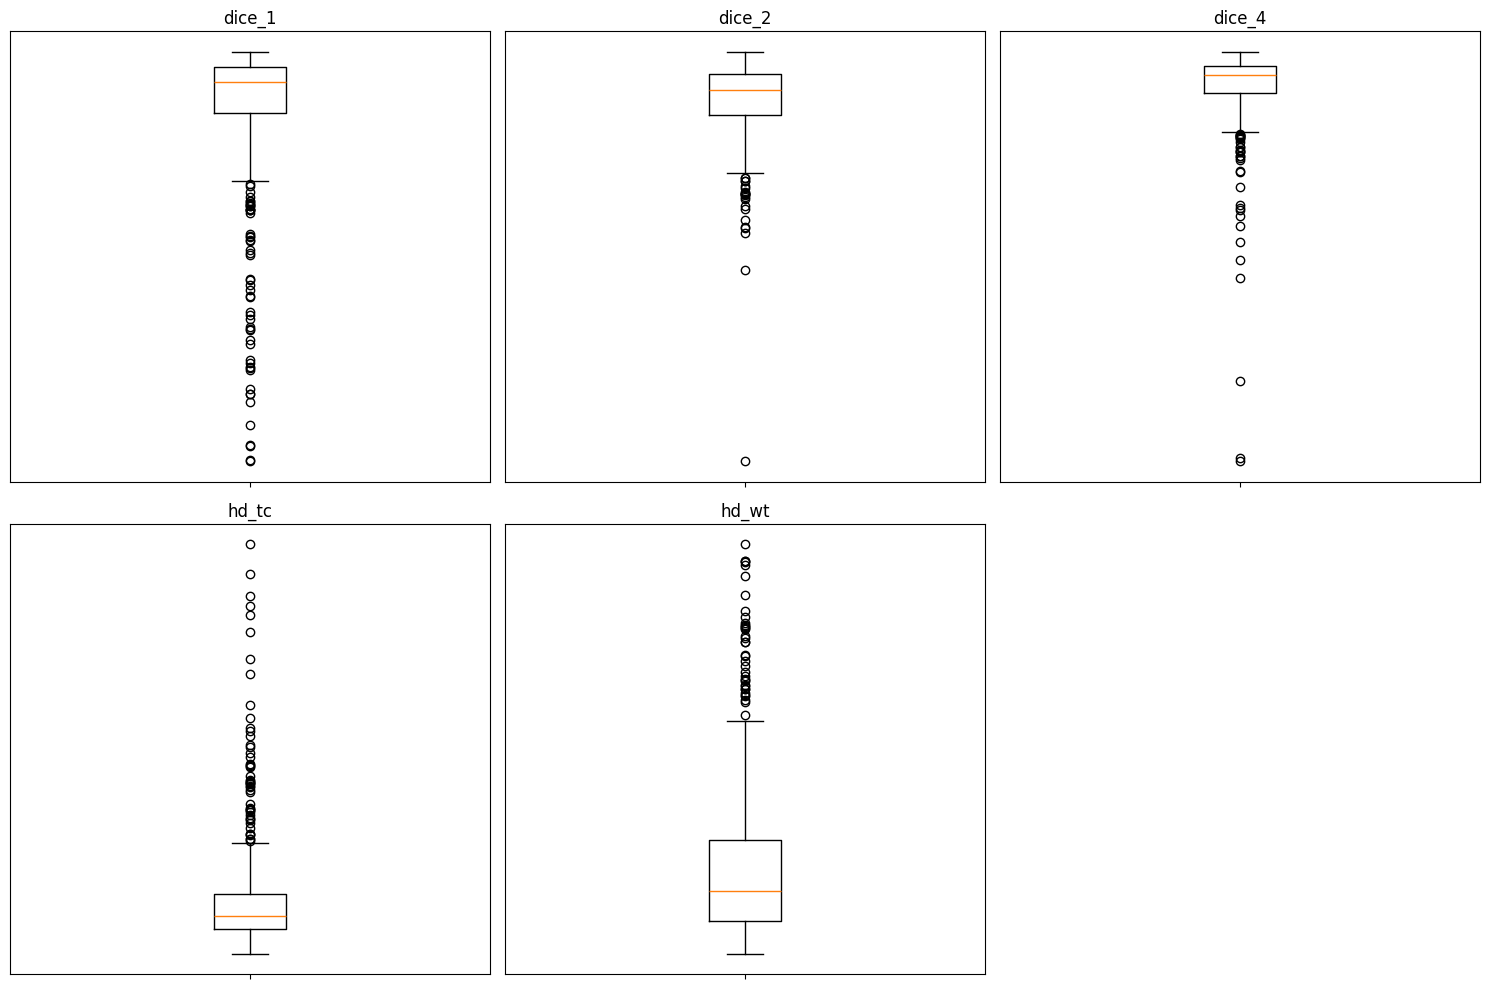

In [56]:
plt.figure(figsize=(15, 10))

# box plots for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(data[metric])
    plt.title(metric)
    plt.xticks([1], [''])  # Hide x-axis values
    plt.yticks([])  # Hide y-axis values

plt.tight_layout()
plt.savefig(f'figs/eval_{case}_boxplot.png')

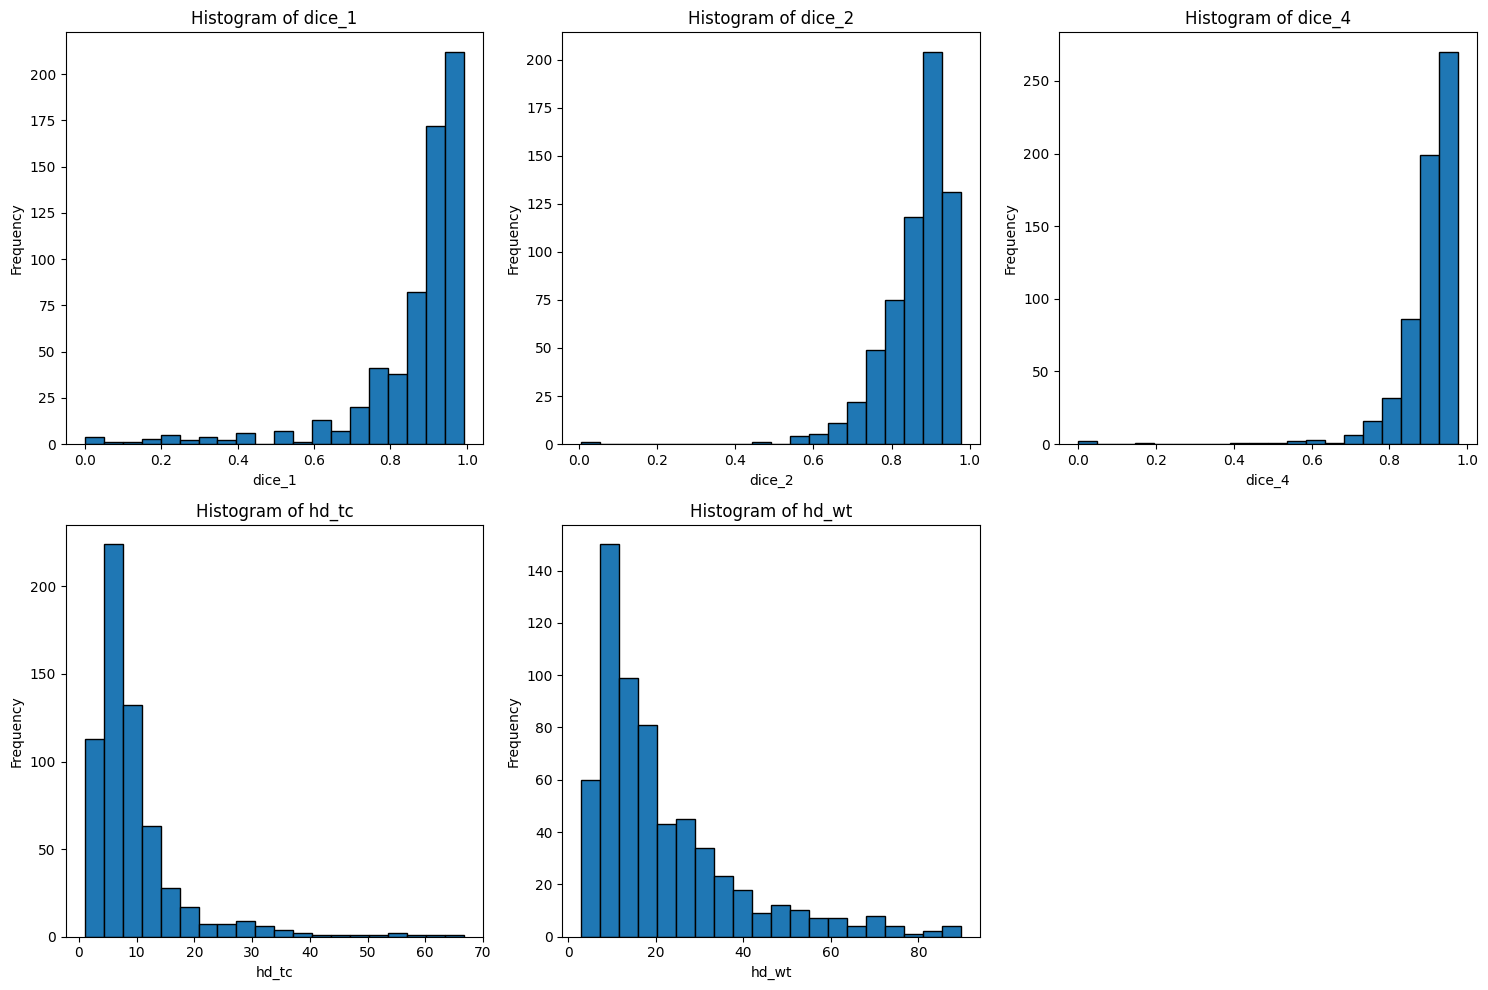

In [57]:
plt.figure(figsize=(15, 10))

metrics = ['dice_1', 'dice_2', 'dice_4', 'hd_tc', 'hd_wt']
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 3, i)
    plt.hist(data[metric], bins=20, edgecolor='black')
    plt.title(f'Histogram of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig(f'figs/eval_{case}_hist.png')